<a href="https://colab.research.google.com/github/thalisrocha/Image-registration-landmarks/blob/main/TP_ImageRegistration_LandmarkSSM_ROCHAPESTANA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Landmark based registration and Statistical Shape Analysis

**Deadline**: Upload this notebook (rename it as 'TP-ImaReg-LandmarkSSM-YOUR-SURNAME.ipynb') on E-Campus before the deadline. No need to zip it.

**Goal**: The goal of this notebook is to implement the algorithms seen today for landmarks based registration and statistical shape analysis. Please complete the code where you see **XXXXXXXXXXXXXX** and answer the questions.

We will use the FEI dataset (https://fei.edu.br/~cet/facedatabase.html) which is composed of several facial images annotated with 68 landmarks (already estimated and placed). Below, you will find a picture with an example. People express two emotions, either neutral or happy.

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='15vsAdMepHzdoZ3iqNS3kpI3KGW7D0vRs',
dest_path='./data/Data_FEI.npz')
gdd.download_file_from_google_drive(file_id='1ywQbf23-JoPklWCcH_mi5Nuw5BQskxvB',
dest_path='./data/facial_landmarks_68markup.jpg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random


Now, let's load the data.

We have a list of images, the position of the landmarks (aligned to the images), the class labels Y (0 for neutral and 1 for happy) and the names of the images.

In [ ]:
# Loading data
Working_directory="./data/"
with np.load(Working_directory + 'Data_FEI.npz') as data:
    Images=data['Images_FEI'] # list of images
    Landmarks = data['Landmarks_FEI'] # original landmarks
    Y = data['Emotions_FEI'] # class, 0 for neutral and 1 for happy
    Names = data['Names_FEI']
N,M = Landmarks.shape # number subjects
dim = 2
M = int(M/dim) # Number of landmarks (they are in 2D)
print('Number of subjects:', N, '; Number of landmarks:',M)
class_names = ["neutral","happy"]

Number of subjects: 400 ; Number of landmarks: 68


Here, we show an example of facial landmarks

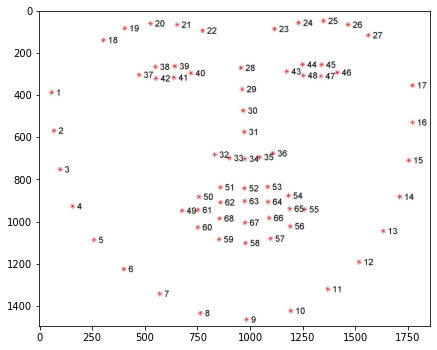

In [ ]:
# Plot the facial landmarks
Example=plt.imread(Working_directory + './facial_landmarks_68markup.jpg') # function to read a jpg image
plt.figure(figsize = (7,7)) # Size of the plot
plt.imshow(Example)
plt.show()

We randomly shuffle the data (even if it is not necessary for the TP)

In [ ]:
# Shuffle data randomly
indeces=np.arange(N) # Integers from 0 to N-1

np.random.seed(10)
np.random.shuffle(indeces)

X=Landmarks[indeces]
Yp=Y[indeces]
Imagesp=Images[indeces]

Namesp=[''] * N
for i in range(0,N):
    Namesp[i]=Names[indeces[i]]


and we plot the first 6 (random) images with their respective landmarks

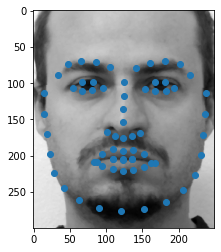

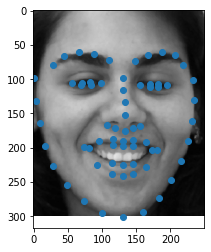

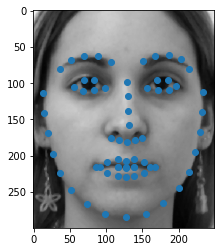

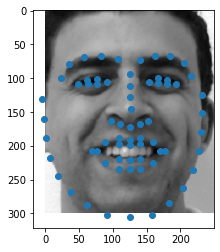

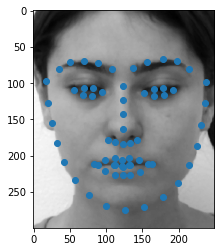

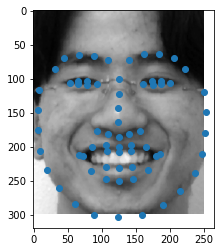

In [ ]:
# plot the first 6 images of the data-set
for i in range(0,6):
    image = Imagesp[i,:,:]
    plt.figure()
    plt.imshow(image, cmap='gray', origin='upper')
    landmark=X[i,:]
    x=landmark[::2]
    y=landmark[1::2]
    plt.plot(x,y,'o')
    plt.show()

Now it's time to implement first the affine transformation and then the procrustes alignement (similarity transformation).
Please complete the code.

In [ ]:
def AffineRegistrationLandmarks(x,y):

    '''
    Inputs:
               x: [M,2] array containing the M 2-dim source landmarks
               y: [M,2] array containing the M 2-dim target landmarks

    Outputs:
               xp: [M,2] array containing the M 2-dim aligned source landmarks
               T: [3,3] transformation matrix
    '''

    if x.shape[0] != y.shape[0] or x.shape[1] != y.shape[1]:
        raise NameError('data should have the same dimensions')

    if x.shape[1] != 2:
        raise NameError('This code works only for 2 dimennsional data')

    M=x.shape[0]

    aux0 = np.zeros((M,3))
    aux1 = np.ones((M,1))

    aux2 = x[:,1].reshape((M, 1))
    aux3 = x[:,0].reshape((M, 1))

    Upx = np.hstack((aux3,np.hstack((aux2,np.hstack((aux1,aux0))))))
    Lwx = np.hstack((aux0,np.hstack((aux3,np.hstack((aux2,aux1))))))

    x1 = np.vstack((Upx,Lwx))
    y1 = np.hstack((y[:,0], y[:,1]))

    T = np.linalg.inv(x1.T @ x1) @ x1.T @ y1

    xp =  (x1 @ T).reshape((2*M,1))

    aux4 = np.array_split(xp, 2)

    xp = np.hstack((aux4[0],aux4[1]))
    T = np.vstack((T.reshape((2,3)),np.array([0, 0, 1])))

    return xp,T


Let's test your implementation and see if it works.

[[ 0.99347639  0.00986134  1.54071523]
 [ 0.02326211  1.00366675 -5.64425   ]
 [ 0.          0.          1.        ]]


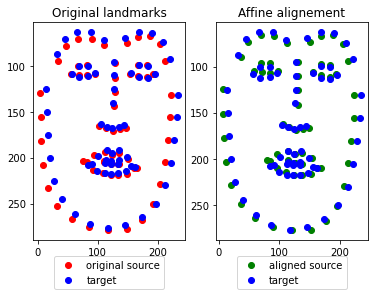

In [ ]:
# Choose two random indeces between 0 and N-1
indexSource = random.randint(0,N-1)
indexTarget = random.randint(0,N-1)

# Choose if you want to plot data or not
show_plot=1

# Procrustes superimposition of two configurations
ls = X[indexSource] # source configuration
Is = Imagesp[indexSource,:,:]
lt = X[indexTarget] # target configuration
It = Imagesp[indexTarget,:,:]

# reshape landmarks configurations as matrices [M,2]
xs=np.reshape(ls,(M,dim))
xt=np.reshape(lt,(M,dim))

xpA,TA=AffineRegistrationLandmarks(xs,xt)
print(TA)

if show_plot==1:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.scatter(xs[:,0], xs[:,1], c='r',label='original source')
    plt.scatter(xt[:,0], xt[:,1], c='b',label='target')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    plt.gca().invert_yaxis()
    plt.title('Original landmarks')
    plt.subplot(1, 2, 2)
    plt.scatter(xpA[:,0], xpA[:,1], c='g',label='aligned source')
    plt.scatter(xt[:,0], xt[:,1], c='b',label='target')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    plt.gca().invert_yaxis()
    plt.title('Affine alignement')

Now, let's implement the procrustes alignement following the inputs and rules explained in the header of the function.

In [ ]:
def procrustes_align(x,y,mode='best',verbose=1, center=1):

    """
    Inputs:
               X: [M,2] array containing the M 2-dim source landmarks
               Y: [M,2] matrix containing the M 2-dim target landmarks
               mode: 'rotation' to have only rotation, 'reflection' to
                   have only reflection and 'best' to have the one decided by the
                   data depending on det(U*V')
               verbose: 1 to have explanations and 0 otherwise

    Outputs:
               Xp: [M,2] array containing the aligned source landmarks
               s: uniform scaling
               R: rotation or reflection matrix
               t: translation vector
               SSR: sum of squared of residuals
               ratio_SSR: ratio of SSR with respect to the initial SSR

    """

    if mode.lower()!='best' and mode.lower()!='rotation' and mode.lower()!='reflection':
        raise NameError('Error ! mode should be equal to best, rotation or reflection')

    if x.shape[0] != y.shape[0] or x.shape[1] != y.shape[1]:
        raise NameError('data should have the same dimensions')

    if x.shape[1] != 2:
        raise NameError('This code works only for 2 dimennsional data')

    M=x.shape[0]

    if  center == 1:
      # Center data
      xc = x - np.mean(x, axis=0)
      yc = y - np.mean(y, axis=0)
    else:
      xc = x
      yc = y

    # Optimal parameters (hint: use np.linalg.svd)
    U, Σ, Vt = np.linalg.svd(xc.T@yc)
    Σ = np.array([[Σ[0],0],[0,Σ[1]]])

    if mode.lower() == 'rotation':
        if np.absolute(np.linalg.det(U @ Vt)-1)<1e-5: # det(R)==1
            if verbose == 1:
                print('The best R is a rotation. Computing rotation.')
            S=np.eye(2)
        elif np.absolute(np.linalg.det(U @ Vt)+1)<1e-5: # det(R)== -1
            if verbose == 1:
                print('The best R is a reflection but a rotation is computed as requested.')
            S=np.array([[1, 0], [0, np.linalg.det(U@Vt)]]) # to have det(U*V')=1
        else:
            raise NameError('Error ! U*Vt should be an orthogonal matrix')
    elif mode.lower() == 'reflection':
        if np.absolute(np.linalg.det(U @ Vt)-1)<1e-5: # det(R)==1
            if verbose == 1:
                print('The best R is a rotation but a reflection is computed as requested.')
            S=np.array([[1, 0], [0, -np.linalg.det(U@Vt)]]) # to have det(U*V')=-1
        elif np.absolute(np.linalg.det(U @ Vt)+1)<1e-5: # det(R)== -1
            if verbose == 1:
                print('The best R is a reflection. Computing reflection.')
            S=np.eye(2)
        else:
            raise NameError('Error ! U*Vt should be an orthogonal matrix')
    elif mode.lower() == 'best':
        if np.absolute(np.linalg.det(U @ Vt)-1)<1e-5: # det(R)==1
            if verbose == 1:
                print('The best R is a rotation. Computing rotation.')
            S=np.eye(2)
        elif np.absolute(np.linalg.det(U @ Vt)+1)<1e-5: # det(R)== -1
            if verbose == 1:
                print('The best R is a reflection. Computing reflection.')
            S=np.eye(2)
        else:
            raise NameError('Error ! U*Vt should be an orthogonal matrix')

    R= U @ S @ Vt
    s= np.trace(S@Σ)/(np.linalg.norm(xc, ord='fro'))**2

    if mode.lower() == 'rotation':
        if np.absolute(np.linalg.det(R)-1)>1e-5:
            raise NameError('Error ! there is a problem...')
    if mode.lower() == 'reflection':
        if np.absolute(np.linalg.det(R)+1)>1e-5:
            raise NameError('Error ! there is a problem...')

    # print(np.mean(y, axis=0).shape)
    t = np.mean(y, axis=0) - (s*(R.T @ np.mean(x, axis=0)))
    # print(t)
    xp = s*(x @ R) + t
    # print(xp)

    # Procrustes residuals
    SSR = np.sum(np.power((y-xp),2))

    # Ratio with initial residual
    SSR0 = np.sum(np.power((y-x),2))
    ratioSSR = SSR*100/(SSR0+1e-18)

    return xp, s, R, t, SSR, ratioSSR

The best R is a rotation. Computing rotation.
1921.526768138731 72.59262441022784


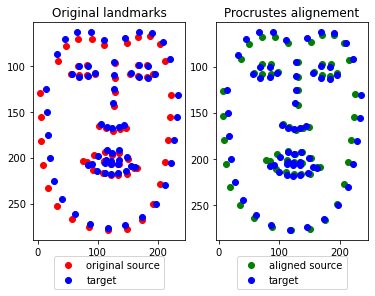

In [ ]:
xp, s, R, t, SSR, ratioSSR = procrustes_align(xs,xt,center=1)

if show_plot==1:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.scatter(xs[:,0], xs[:,1], c='r',label='original source')
    plt.scatter(xt[:,0], xt[:,1], c='b',label='target')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    plt.gca().invert_yaxis()
    plt.title('Original landmarks')
    plt.subplot(1, 2, 2)
    plt.scatter(xp[:,0], xp[:,1], c='g',label='aligned source')
    plt.scatter(xt[:,0], xt[:,1], c='b',label='target')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    plt.gca().invert_yaxis()
    plt.title('Procrustes alignement')

    print(SSR, ratioSSR)

The best R is a rotation. Computing rotation.
2069.319432984389 78.17602693556438


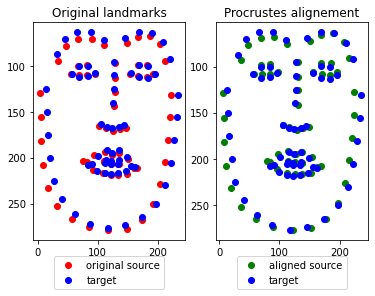

In [ ]:
xp, s, R, t, SSR, ratioSSR = procrustes_align(xs,xt,center=0)

if show_plot==1:
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.scatter(xs[:,0], xs[:,1], c='r',label='original source')
    plt.scatter(xt[:,0], xt[:,1], c='b',label='target')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    plt.gca().invert_yaxis()
    plt.title('Original landmarks')
    plt.subplot(1, 2, 2)
    plt.scatter(xp[:,0], xp[:,1], c='g',label='aligned source')
    plt.scatter(xt[:,0], xt[:,1], c='b',label='target')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))
    plt.gca().invert_yaxis()
    plt.title('Procrustes alignement')
    print(SSR, ratioSSR)

**QUESTIONS**

*   What happens if you center the configurations before the alignment ?
*   When do you expect a perfect alignment ?



* If we center the configuration before the alignment it is possible to observe that the sum of squares of residuals becomes smaller than when we not center the data.
When we center the data the SSR is equal to 4863,82.
When we do not center the data the SSR is equal to 5595,23. Knowing the SSR is a measure of the discrepancy between the data and an estimation model, we can conclude that when we center the data before the alignment the discrepancy between the aligned source and the target becomes smaller.

* The shape being defined as the information that remains when location, scale and rotation effects are filtered out from an object (Stegmann and Gomez (2002). A Brief Introduction to Statistical
Shape Analysis) and knowing that Procrustes Superimposition is performed by optimally translating, rotating and uniformly scalling the objects, a perfect alignment is expected when the source and target landmarks have exactly the same shape.

Now, using the functions implemented in the previous jupyter-notebook apply the transformation computed with the affine and/or procrustes alignement to the source image.

In [ ]:
def nearestNeighboutInterp(pM,I,coords=None):
  '''
  Nearest Neighbout interpolation

  Inputs:
      pM: 2D point defining the coordinates to interpolate
      I: image used for interpolation
      coords: coordinates of the image. If None, the coordinates of a pixel
              are automatically its row and column position

  Output:
      value: interpolated value at pM
  '''

  if coords is None:
      # row and column of pM
      r = pM[0]
      c = pM[1]

      # check if r and c are within the domain of I (I.shape)
      if (0 <= round(r) < I.shape[0]) and (0 <= round(c) < I.shape[1]):
          value = I[round(r), round(c)]
      else:
          value = 0

  else:
      raise ValueError("Error ! Still not implemented")
      value=0

  return value

def InverseWarping(I,T,coords=None,outputShape=None):
    '''
    Apply inverse warping to an image I based on a transformation T.
    Transformation is defined by a 3x3 matrix

    Inputs:
        I: image to transform
        T: 3x3 matrix trasformation
        coords: coordinates of the image. If None, the coordinates of a pixel
                are automatically its row and column position
        outputShape: defines the shape of the transformed image.
                     It can be 'None', same shape as the input image I or 'BB',
                     bounding box of the transformed image I_T,  or a tuple/numpy
                     array with 4 elements (min x, max x, min y, max y)
        interpolation: defines the interpolation method applied
                      It can be None, to nearest neighbors,
                      or "bilinear".

    Output:
        J: transformed image
    '''

    if coords is None:

        if outputShape is None:
            outputShape=(0,I.shape[0],0,I.shape[1])

        elif outputShape == 'BB':
            coords = np.mgrid[0:I.shape[0], 0:I.shape[1]] # coordinates
            cm = applyTransformation(T,coords=coords)[1]
            #Find extremities bounding box
            bx=int(np.floor(np.min(cm[0,:,:])))
            ux=int(np.ceil(np.max(cm[0,:,:])))
            by=int(np.floor(np.min(cm[1,:,:])))
            uy=int(np.ceil(np.max(cm[1,:,:])))
            outputShape=(bx,ux,by,uy)
            print(outputShape, cm.shape[2], cm.shape[1])

        elif isinstance(outputShape, tuple):
            if len(outputShape) != 4:
                raise ValueError("Error ! outputShape should be of length 4")

        elif isinstance(outputShape, np.ndarray):
            if len(outputShape) != 4:
                raise ValueError("Error ! outputShape should be of length 4")
        else:
            raise ValueError("Error ! outputShape should be None, 'BB' or a tuple/numpy array with 4 elements")

        J= np.zeros((outputShape[1]-outputShape[0],outputShape[3]-outputShape[2])) # transformed image

        for u in range(outputShape[0], outputShape[1]):
            for v in range(outputShape[2], outputShape[3]):

                p = np.array([u,v,1])     # coordinate of a pixel to transform
                pM = np.linalg.inv(T) @ p # transformed coordinate xy

                if pM[-1] != 0:
                  pM = pM/(pM[-1]+1e-14) # normalization in case of homography

                  # shifting since the first pixel will be in (0,0) in the output image
                  if outputShape[0]<0:
                      x=u+abs(outputShape[0])
                  elif outputShape[1]> J.shape[0]:
                      x=u-abs(outputShape[0])
                  else:
                      x=u
                  if outputShape[2]<0:
                      y=v+abs(outputShape[2])
                  elif outputShape[3]> J.shape[1]:
                      y=v-abs(outputShape[2])
                  else:
                      y=v

                  J[x,y]=nearestNeighboutInterp(pM,I)

    else:
        raise ValueError("Error ! Still not implemented")

    return J

In [ ]:
def applyTransformation(T, points=None, coords=None):
  '''
  Apply geometric transformation to points or image coordinates.
  Transformation is defined by a 3x3 matrix

  Inputs:
      points: Nx2 Numpy array of points
      coordinates: 2xNxM Numpy array of image coordinates
      T: 3x3 matrix trasformation

  Output:
      pm: Nx2 points after transformation
      cm: 2xNxM image coordinates after transformation
  '''
  if points is None and coords is None:
      raise ValueError("Error ! You should provide points and/or coords")

  if points is not None:
      N,d = points.shape
      if d != 2 and N==2:
          print('WARNING ! points should be an array of dimension Nx2'+
                ' Transposing the array')
          points=points.T
          N,d = points.shape

      if d != 2:
          raise ValueError("Error ! Function works only with 2D points")

      # Transform points into homogeneous coordinates (adding one...)
      ones = np.ones((N,1))
      points_homo = np.hstack((points, ones))

      # Apply transformation
      pm = T @ points_homo.T


      # If homography, ...
      if T[2,0] != 0 or T[2,1] != 0:
        pm = pm/(pm[2,:]+1e-14)
      # pm=XXXXXXXXXXXXXX
  else:
      pm=None

  if coords is not None:
      d,N,M = coords.shape

      if d != 2:
          raise ValueError("Error ! Function works only with 2D coordinates")

      p = coords.reshape((2,N*M)).T # reshape coordinates as list of points
      # Transform points into homogeneous coordinates (adding one...)
      ones = np.ones((N*M,1))
      p_homo = np.hstack((p,ones))

      # Apply transformation
      pm = T @ p_homo.T

      # If homography, ...
      if T[2,0] != 0 or T[2,1] != 0:
        pm = pm/(pm[2,:]+1e-14)

      cm = pm[:2].reshape((2,N,M))

  else:
      cm =None

  return pm.T,cm


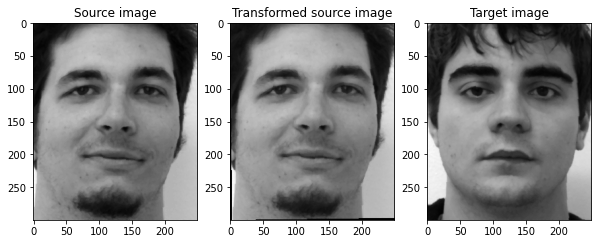

In [ ]:
# compute T
T = np.array([
            [s*R[0,0], s*R[0,1], t[0]],
            [s*R[1,0], s*R[1,1], t[1]],
            [0, 0, 1]
            ])

Ism=InverseWarping(Is,T,outputShape=None)

fig = plt.figure(figsize=(10, 15))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.imshow(Is, cmap='gray')
ax1.set_title('Source image')
ax2.imshow(Ism, cmap='gray')
ax2.set_title('Transformed source image')
ax3.imshow(It, cmap='gray')
ax3.set_title('Target image')
plt.show()

Now let's implement the Generalized Procrustes Analysis (GPA) using the previously implemented procrustes alignement function.

As before, please follow the inputs and rules explained in the header of the function.

In [ ]:
def generalized_procrustes_analysis(X,tau=1e-5,tangent=1):
  """
  Inputs:
            X: [N,2M] array containing N configurations of 2D landmarks.
               Each configuration has M landmarks
            tau: parameter for the stopping criteria (please refer to the slides
                 of the course)
            tangent: if set to 1, data will be projected onto the tangent space

  Outputs:
            Xm1: [M,2] array containing the landmarks of the average configuration
            Xcp: [N,2M] array containing the aligned landmarks onto Xm1

  """

  if X.shape[1] % 2 != 0:
        raise NameError('This code works only for 2 dimennsional data')

  # Parameters
  N,M=X.shape
  dim=2
  M=int(M/dim)

  # Plot original data
  plt.figure()
  for i in range(0,N):
      landmark=X[i]
      x=landmark[::2]
      y=landmark[1::2]
      plt.scatter(x, y, c='r')
  plt.gca().invert_yaxis()
  plt.title('Original landmarks')

  ## 1
  # Center each configuration
  Xc=np.zeros((N,M*dim))

  for i in range(0,N):
      Xc[i,::2] = X[i,::2] - np.mean(X[i,::2])
      Xc[i,1::2] = X[i,1::2] - np.mean(X[i,1::2])

  ##2
  # Compute first average configuration
  Xm0 = np.mean(Xc,axis=0)

  # Plot configurations and first average
  plt.figure()
  for i in range(0,N):
      landmark=Xc[i]
      x=landmark[::2]
      y=landmark[1::2]
      plt.scatter(x, y, c='r')
  plt.scatter(Xm0[::2],Xm0[1::2],c='g',label='average')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.gca().invert_yaxis()
  plt.title('Centered data with first average')

  ## 2
  # Normalize average
  IM = np.eye(M)
  oneM = np.ones((M,1))
  C = IM - (1/M) * (oneM @ oneM.T)
  CX = np.linalg.norm(C @ Xm0.reshape((M,dim)), ord = 'fro')
  Xm0 = np.reshape(Xm0, (M,2)) / CX

  ## 3
  # Procrustes alignement of all configurations to the average Xm0
  Xcp=np.zeros((N,M*dim))
  for i in range(0,N):
      Xcp[i] = np.reshape(procrustes_align(np.reshape(Xc[i],(M,dim)) ,Xm0.reshape((M,2)),'best',0)[0],(M*dim))


  # Reshape average as vector
  Xm0=np.reshape(Xm0, M*dim)
  # print(Xm0.shape)

  # Plot configurations and average
  plt.figure()
  for i in range(0,N):
      landmark=Xcp[i]
      x=landmark[::2]
      y=landmark[1::2]
      plt.scatter(x, y, c='r')
  plt.scatter(Xm0[::2],Xm0[1::2],c='g',label='average')
  plt.gca().invert_yaxis()
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title('Aligned data to normalized initial mean')

  ## 4
  # Tangent space projection
  if tangent==1:
      # landmarks after tangent space projection
      Xcpt=np.zeros((N,M*dim))
      # vector measuring the difference before/after projection
      diff = np.zeros((N,1))

      for i in range(0,N):
          Xcpt[i]=((np.linalg.norm(Xm0)**2)/ np.inner(Xcp[i], Xm0))*Xcp[i]
          diff[i]=np.linalg.norm(Xcp[i] - Xcpt[i])

      # we look for the subject with the maximum difference before/after projection
      ind=np.argmax(diff)

      # Plot configurations and first average
      plt.figure()
      l=Xcp[ind]
      lt=Xcpt[ind]
      plt.scatter(l[::2], l[1::2], c='r', label='before projection')
      plt.scatter(lt[::2], lt[1::2], c='b', label='after projection')
      plt.gca().invert_yaxis()
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
      plt.title('Subject with maximum variation')

      plt.figure()
      for i in range(0,N):
          landmark=Xcp[i]
          x=landmark[::2]
          y=landmark[1::2]
          if i==ind:
              plt.scatter(x, y, c='b',label='Subject with max distortion', zorder=10)
          else:
              plt.scatter(x, y, c='r')

      plt.scatter(Xm0[::2],Xm0[1::2],c='g',label='average', zorder=5)
      plt.gca().invert_yaxis()
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
      plt.title('Subjects before projection')

      Xcp=Xcpt

  ## 5
  # Re-estimate average configuration
  Xm1=np.mean(Xcp, axis=0)

  ## 6
  # Procrustes alignement of Xm1 to Xm0
  Xm1, s, R, t, SSR, ratioSSR = procrustes_align(np.reshape(Xm1,(M,dim)) ,np.reshape(Xm0,(M,dim)),'best',0)

  # Normalize new average Xm1
  CXm1 = np.linalg.norm(C @ Xm1.reshape(M,dim), ord = 'fro')
  Xm1 = Xm1.reshape(M,2)/ CXm1

  # Reshape average as vector
  Xm1=np.reshape(Xm1, M*dim)

  # Plot configurations and new average
  plt.figure()
  for i in range(0,N):
      landmark=Xcp[i]
      x=landmark[::2]
      y=landmark[1::2]
      plt.scatter(x, y, c='r')
  plt.scatter(Xm1[::2],Xm1[1::2],c='g',label='average')
  plt.gca().invert_yaxis()
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.title('Aligned data to new mean')

  ## 7
  itera=0
  while np.sqrt(np.dot((Xm0-Xm1),(Xm0-Xm1))) > tau:
      itera=itera+1
      print('Iter number %d , Error: %f' % (itera, np.sqrt(np.dot((Xm0-Xm1),(Xm0-Xm1))) ) )

      # Update Xm0 to Xm1
      Xm0=Xm1

      # Procrustes alignement of all configurations to the average Xm0
      for i in range(0,N):
          temp=np.reshape(Xc[i],(M,dim))
          xp, s, R, t, SSR, ratioSSR = procrustes_align(temp,np.reshape(Xm0,(M,dim)),'best',0)
          Xcp[i]=np.reshape(xp,(M*dim))

      # Tangent space projection
      if tangent==1:
          for i in range(0,N):
              Xcpt[i] = ((np.linalg.norm(Xm0)**2)/ np.inner(Xcp[i], Xm0))*Xcp[i]
      else:
        Xcpt = Xcp

      # Re-estimate average configuration
      Xm1 = np.mean(Xcpt, axis=0)

      # Procrustes alignement of Xm1 to Xm0
      Xm1, s, R, t, SSR, ratioSSR = procrustes_align(np.reshape(Xm1,(M,dim)),np.reshape(Xm0,(M,dim)),'best',0)

      # Normalize new average Xm1
      CXm1 = np.linalg.norm(C @ Xm1.reshape(M,dim), ord = 'fro')
      Xm1 = Xm1.reshape(M,2)/ CXm1

      # Reshape average as vector
      Xm1=np.reshape(Xm1,(M*dim))

      # Plot configurations and new average
      plt.figure()
      for i in range(0,N):
          landmark=Xcp[i]
          x=landmark[::2]
          y=landmark[1::2]
          plt.scatter(x, y, c='r')
      plt.scatter(Xm1[::2],Xm1[1::2],c='g',label='average')
      plt.gca().invert_yaxis()
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
      plt.title('GPA results after iter %i' % itera)

      print('After iter number %d , Error: %f' % (itera, np.sqrt(np.dot((Xm0-Xm1),(Xm0-Xm1))) ) )


  return Xcp, Xm1


Let's test your implementation and see if it works.

Iter number 1 , Error: 0.000585
After iter number 1 , Error: 0.000000


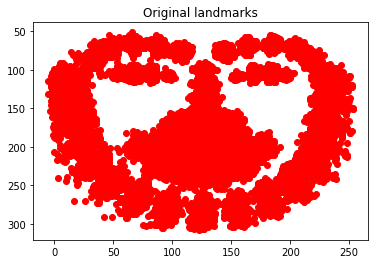

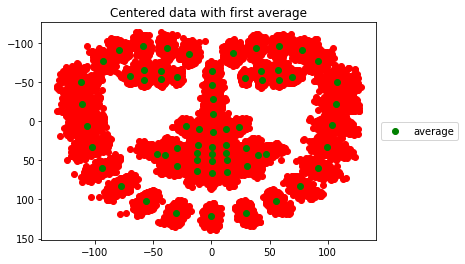

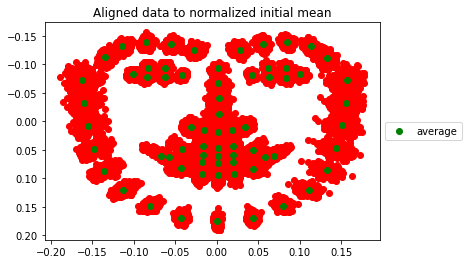

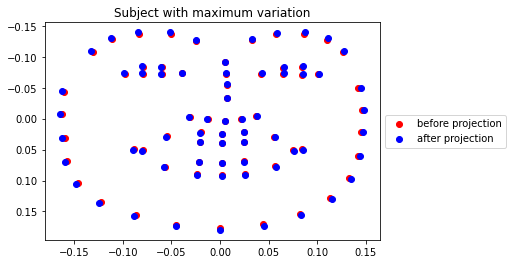

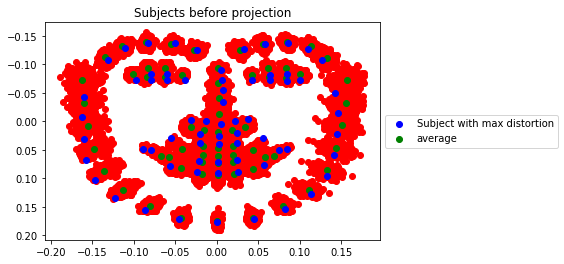

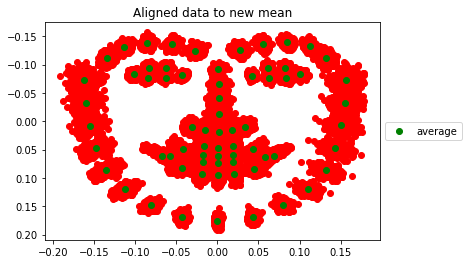

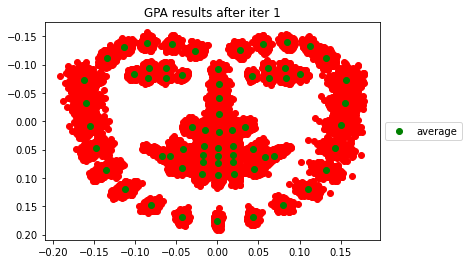

In [ ]:
#  GPA (Generalized Procrustes Analysis)
Xcpt, Xm1t  = generalized_procrustes_analysis(X)

Iter number 1 , Error: 0.000590
After iter number 1 , Error: 0.000001


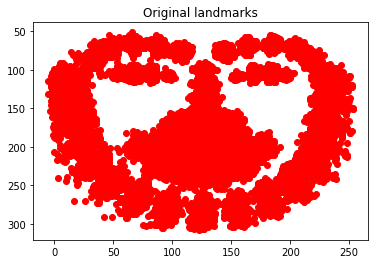

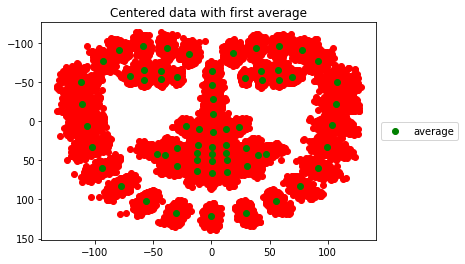

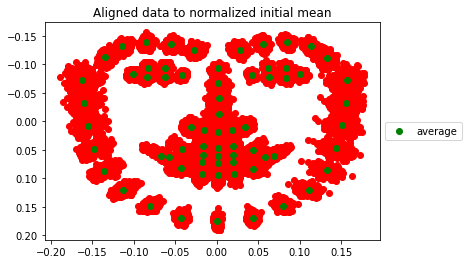

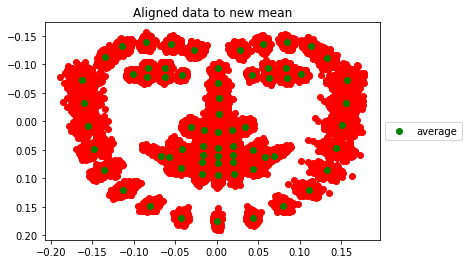

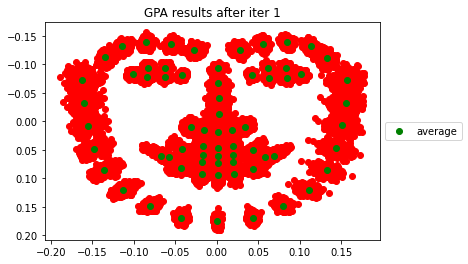

In [ ]:
#  GPA (Generalized Procrustes Analysis)
Xcp, Xm1  = generalized_procrustes_analysis(X, tangent = 0)

**QUESTIONS**


*   Try not to project the data onto the tangent space (i.e. `tangent=0`). Do the results vary ? Why in your opinion ? Hint: Look at the variability of the original data...
*   Do the following four triangles have the same shape ? Explain why ?

![shape.png](https://drive.google.com/uc?id=10OSJUfNDJ1xw6H3sRu7l3LRoojxju_4L)



* Concerning the results of Generalized Procrustes Analysis with and without the tangent space projection, it is possible to observe that the differences between the results are imperceptible. Probably, this occurs because the original data does not vary that much. Consequently, the original landmarks are already closer to the average landmarks, in such a way that the data after the tangent projection presents a negligible distortion. In fact, the practical impact of tangent space projection is rarely that clear according to the literature ((Stegmann and Gomez (2002). A Brief Introduction to Statistical Shape Analysis)).

* As seen before, shape is defined as the information that remains when location, scale and rotation effects are filtered out from an object. The second triangle (from the left to the right) was reflected and the fourth was sheared. Thus, it is possible to conclude that the four triangles does not have the same shape since we filter out location, scale and rotation effects they will not present the same information.

Let's compute the shape variability using PCA. You will compute the three modes of deformations, as described in the slides of the lecture, at $\pm 3 \sigma$, where $\sigma$ is the standard deviation thus the square root of the the relative eigenvalue

The first three modes explain 29.665079, 25.042333 and 12.517935 of the total variability respectively


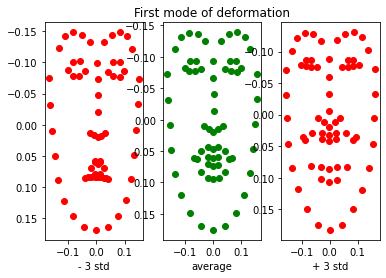

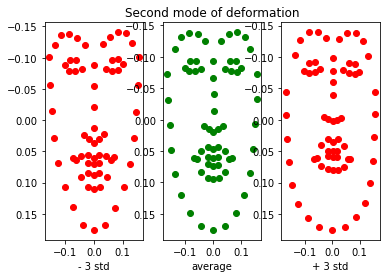

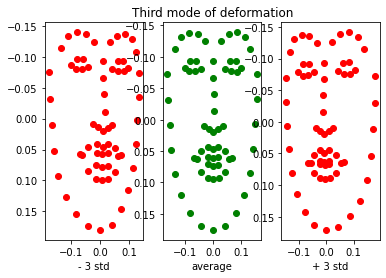

In [ ]:
#%% Shape variability analysis
# we will use the scikit-learn implementation for PCA
from sklearn.decomposition import PCA

# PCA
pca = PCA(random_state=1) # by fixing the random_state we are sure that results are always the same
Y=pca.fit_transform(Xcp)
U=pca.components_.T # we want PC on columns
D = (pca.singular_values_)**2/(X.shape[0]-1) # computation of the eigenvalues
var_explained = pca.explained_variance_ratio_*100 # variance explained

print('The first three modes explain %f, %f and %f of the total variability respectively' % (var_explained[0], var_explained[1], var_explained[2]))

# Compute first mode
first_mode_m= Xm1 - 3*np.sqrt(D[0])*U[:,0]
first_mode_p= Xm1 + 3*np.sqrt(D[0])*U[:,0]
# Compute second mode
second_mode_m= Xm1 - 3*np.sqrt(D[1])*U[:,1]
second_mode_p= Xm1 + 3*np.sqrt(D[1])*U[:,1]
# Compute third mode
third_mode_m= Xm1 - 3*np.sqrt(D[2])*U[:,2]
third_mode_p= Xm1 + 3*np.sqrt(D[2])*U[:,2]

if show_plot==1:
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.scatter(first_mode_m[::2], first_mode_m[1::2], c='r')
    plt.xlabel('- 3 std')
    plt.gca().invert_yaxis()
    plt.subplot(1, 3, 2)
    plt.scatter(Xm1[::2], Xm1[1::2], c='g')
    plt.xlabel('average')
    plt.title('First mode of deformation')
    plt.gca().invert_yaxis()
    plt.subplot(1, 3, 3)
    plt.scatter(first_mode_p[::2], first_mode_p[1::2], c='r')
    plt.xlabel('+ 3 std')
    plt.gca().invert_yaxis()

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.scatter(second_mode_m[::2], second_mode_m[1::2], c='r')
    plt.xlabel('- 3 std')
    plt.gca().invert_yaxis()
    plt.subplot(1, 3, 2)
    plt.scatter(Xm1[::2], Xm1[1::2], c='g')
    plt.xlabel('average')
    plt.title('Second mode of deformation')
    plt.gca().invert_yaxis()
    plt.subplot(1, 3, 3)
    plt.scatter(second_mode_p[::2], second_mode_p[1::2], c='r')
    plt.xlabel('+ 3 std')
    plt.gca().invert_yaxis()

    plt.figure()
    plt.subplot(1, 3, 1)
    plt.scatter(third_mode_m[::2], third_mode_m[1::2], c='r')
    plt.xlabel('- 3 std')
    plt.gca().invert_yaxis()
    plt.subplot(1, 3, 2)
    plt.scatter(Xm1[::2], Xm1[1::2], c='g')
    plt.xlabel('average')
    plt.title('Third mode of deformation')
    plt.gca().invert_yaxis()
    plt.subplot(1, 3, 3)
    plt.scatter(third_mode_p[::2], third_mode_p[1::2], c='r')
    plt.xlabel('+ 3 std')
    plt.gca().invert_yaxis()


**QUESTIONS**


*   How many modes do you need to explain 90% of the variability ?
*   Which anatomical variability do the first three modes show ? Was it expected ?
*   How could you check whether they show an anatomically plausible deformation ?
*   Let's say that the anatomical deformation is not anatomically plausible, which kind of deformation would you use instead ? Why ?




In [ ]:
var = 0
count_mode = 0
for mode in var_explained:
  var += mode
  if var >= 90: break
  count_mode+=1
print("%f of variability is explained with %d modes" % (var, count_mode))

91.213416 of variability is explained with 8 modes


* Anatomically, the first mode presents variability in the mouth and eyes regions. The second mode presents variability in the nose and mouth distance, as well as their position. Also is possible to verify a difference in the face format. The third mode presents variability in the face orientation. These are the results expected from the first three modes as explained in the lecture concerning statistical shape analysis.



* The deformation of a pixel at location $z = (x,y) $ is defined as:

$T(z)=z+v(z)$
with
$$v(z)= ∑\limits_{p=1}^{N} K(z,i_{p}) α_{p}$$

where $K$ is a kernel and $\alpha_{p}$ is a 2D vector which need to be estimated. This definition follows a small displacement model in which a displacement field is added to an identity transform.

It is possible to approximate the inverse by subtracting the displacement as follows:

$T(z')^{-1}=z'-v(z')$

This is a very approximate inverse and fails for larger deformations. The composition of the forward and inverse deformations is given by:

$T(T(z')^{-1})=z'-v(z') + v(z'-v(z'))$

As is possible to verify in the above equation, the composition of the forward and inverse transformations does not produce an identity transformation. The error is equal to the expression: $ v(z'-v(z'))$ and can be applied to estimate the deformation. If the error is larger the deformation is larger and we might have intersections, holes or tearing in the result.

Thereby, to check if the mode shows an anatomically plausible deformation I would check the error given by the small displacement model.

Maybe other possibilities are to calculate Procrustes residuals to measure the differences between the deformed data and the average or to analyse if the variability explained by this mode is plausible.





* If the anatomical deformation is not anatomically plausible, it means that the deformation is larger. In this case, the small displacement model is not desirable. An alternative could be applying large displacement registration or diffeomorphism. Using a diffeomorphic transformation it is possible to preserve topology and spatial organization, such that no intersection, folding or shearing may occur. In addition, by using diffeomorphism, it is possible to define
local non-linear deformations at every point in the space, allowing a better alignment than affine transformations and a quantification of the shape differences at every point of the anatomical structure.